# Installing dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
# import matplotlib.axes as mtax
import matplotlib.ticker as ticker

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import openpyxl as oxl

# Reading Transaction data

In [5]:
tr = pd.read_excel("Transaction.xlsx")

In [6]:
tr.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


# Data Cleaning

In [7]:
tr = tr.dropna()

In [8]:
tr['profit'] = tr.apply(lambda x: x['list_price']- x['standard_cost']  ,axis =1)

In [9]:
tr.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,1055.82


In [10]:
tr.drop(['product_first_sold_date'] , axis=1 ,inplace = True)

In [11]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    19445 non-null  int64         
 1   product_id        19445 non-null  int64         
 2   customer_id       19445 non-null  int64         
 3   transaction_date  19445 non-null  datetime64[ns]
 4   online_order      19445 non-null  float64       
 5   order_status      19445 non-null  object        
 6   brand             19445 non-null  object        
 7   product_line      19445 non-null  object        
 8   product_class     19445 non-null  object        
 9   product_size      19445 non-null  object        
 10  list_price        19445 non-null  float64       
 11  standard_cost     19445 non-null  float64       
 12  profit            19445 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 2.1+ MB


In [49]:
tr['product_line'].value_counts()

Standard    13920
Road         3894
Touring      1213
Mountain      418
Name: product_line, dtype: int64

In [50]:
tr['product_class'].value_counts()

medium    13587
high       2952
low        2906
Name: product_class, dtype: int64

In [51]:
tr['product_size'].value_counts()

medium    12767
large      3900
small      2778
Name: product_size, dtype: int64

In [52]:
tr['brand'].value_counts()

Solex             4169
WeareA2B          3245
Giant Bicycles    3244
OHM Cycles        2993
Trek Bicycles     2931
Norco Bicycles    2863
Name: brand, dtype: int64

In [53]:
tr['order_status'].value_counts()

Approved     19273
Cancelled      172
Name: order_status, dtype: int64

In [12]:
tr = tr[tr['order_status'] == "Approved"]

In [13]:
tr.to_csv('Transaction.csv')

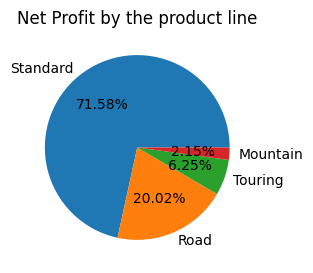

In [55]:
product_lines = tr['product_line'].value_counts().index
x = tr['product_line'].value_counts()
plt.figure(figsize = (3,3))
plt.pie(x,explode = [0,0,0,0],labels = product_lines, autopct = '%2.2f%%')
plt.title("Net Profit by the product line")
plt.show()

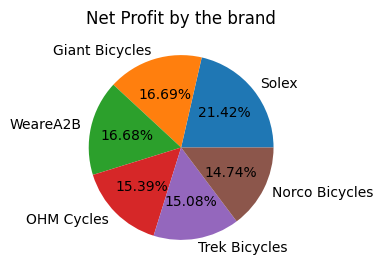

In [57]:
brands = tr['brand'].value_counts().index
x = tr['brand'].value_counts()
plt.figure(figsize = (3,3))
plt.pie(x,labels = brands, autopct = '%2.2f%%')
plt.title("Net Profit by the brand")
plt.show()

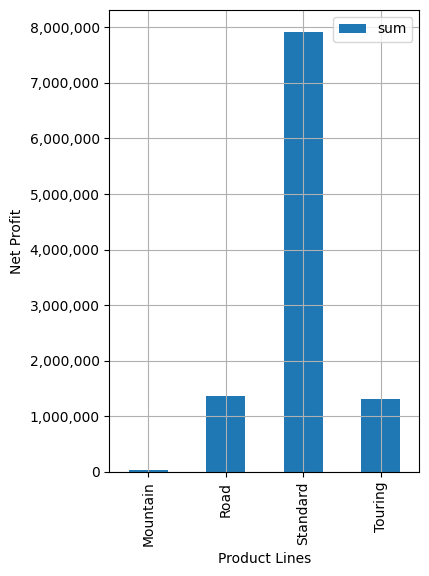

In [92]:
profit_by_line = tr.groupby('product_line')['profit'].agg(['sum'])
profit_by_line.plot(ylabel = "Net Profit" , xlabel = "Product Lines" ,kind ="bar" ,figsize =(4,6))
plt.grid('black')
ax = plt.gca()
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.draw()

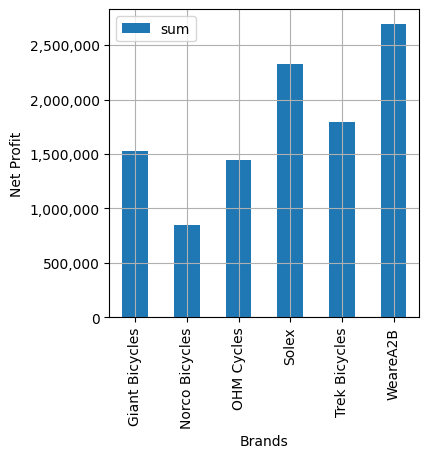

In [93]:
profit_by_brand = tr.groupby('brand')['profit'].agg(['sum'])
profit_by_brand.plot(ylabel = "Net Profit" , xlabel = "Brands" ,kind ="bar" ,figsize =(4,4))
plt.grid('black')
ax = plt.gca()
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ','))
)
plt.show()

In [99]:
#Creating a dataset with standard product line's customers
stdcst = tr[tr['product_line'] == "Standard"]

In [105]:
stdcst['customer_id'].value_counts()

2659    12
1103    11
1913    11
3326    11
2183    11
        ..
1387     1
1685     1
530      1
922      1
3424     1
Name: customer_id, Length: 3448, dtype: int64

In [116]:
filtered = stdcst.groupby('customer_id').filter(lambda x: len(x) > 7)
filtered['customer_id']

4         787
11       2783
62        368
73       1506
74       1346
         ... 
19909    3143
19939     941
19953     853
19954     924
19980    3304
Name: customer_id, Length: 1320, dtype: int64

In [127]:
filtered.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,profit
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1055.82
11,12,61,2783,2017-01-05,1.0,Approved,OHM Cycles,Standard,low,medium,71.16,56.93,14.23
62,63,35,368,2017-12-17,0.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,448.68
73,74,56,1506,2017-01-21,1.0,Approved,OHM Cycles,Standard,medium,medium,183.86,137.90,45.96
74,75,58,1346,2017-06-20,0.0,Approved,OHM Cycles,Standard,medium,medium,912.52,141.40,771.12


In [129]:
customer_to_be_focused = filtered['customer_id'].values

In [130]:
customer_to_be_focused

array([ 787, 2783,  368, ...,  853,  924, 3304], dtype=int64)

# Reading Customer's Address

In [13]:
ad = pd.read_excel("CustomerAddress.xlsx")

In [14]:
ad.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


# Adding Demographic data

In [ ]:
de = pd.read_excel("CustomerDemographic.xlsx")

In [16]:
de.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
